### Info about colour averaging

An image can be summarized down into one average color by taking the average color of all pixels in the image.
- Each pixel in an image is represented by a combination of three color values: red, green, and blue (RGB). 
- The range of each value is usually from 0 to 255, representing the intensity of the color.

To compute the average color of an image, the RGB values of each pixel are first extracted and then averaged across all pixels in the image. The resulting values represent the average color of the image.

#### Example
An image is often represented as a two-dimensional array of numbers, where each number represents the intensity or color of a pixel. The size of the array corresponds to the dimensions of the image, and each element in the array corresponds to a pixel in the image.

For example, consider a simple grayscale image of size 4x4 pixels:

|    |  0 |  1 |  2 |  3 |
|----|----|----|----|----|
|  0 | 10 | 15 | 20 | 25 |
|  1 | 30 | 35 | 40 | 45 |
|  2 | 50 | 55 | 60 | 65 |
|  3 | 70 | 75 | 80 | 85 |

In this case, the numbers in the array represent the intensity of each pixel, ranging from 0 (black) to 255 (white). For example, the pixel in the top-left corner of the image has an intensity of 10, while the pixel in the bottom-right corner has an intensity of 85.

For a color image, the array would have an extra dimension representing the color channels (usually red, green, and blue), resulting in a three-dimensional array. For example, a color image of size 4x4 pixels might be represented as:

|    |        0         |        1         |        2         |         3         |
|----|-----------------|-----------------|-----------------|------------------|
|  0 | [10, 20, 30]    | [15, 25, 35]    | [20, 30, 40]    | [25, 35, 45]     |
|  1 | [30, 40, 50]    | [35, 45, 55]    | [40, 50, 60]    | [45, 55, 65]     |
|  2 | [50, 60, 70]    | [55, 65, 75]    | [60, 70, 80]    | [65, 75, 85]     |
|  3 | [70, 80, 90]    | [75, 85, 95]    | [80, 90, 100]   | [85, 95, 105]    |

In this case, each pixel is represented by a three-element array, with each element representing the intensity of the red, green, and blue channels, respectively. For example, the pixel in the top-left corner of the image has a red intensity of 10, a green intensity of 20, and a blue intensity of 30.

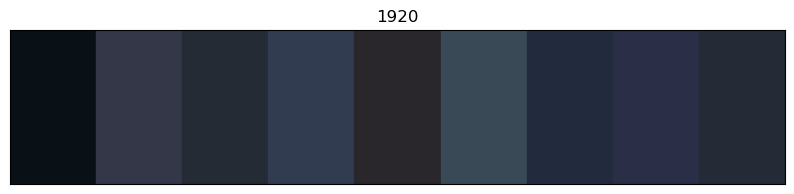

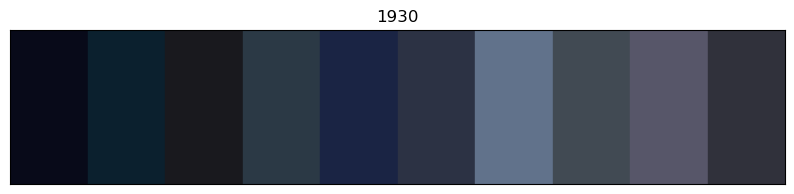

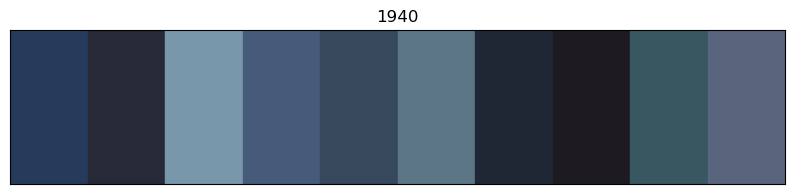

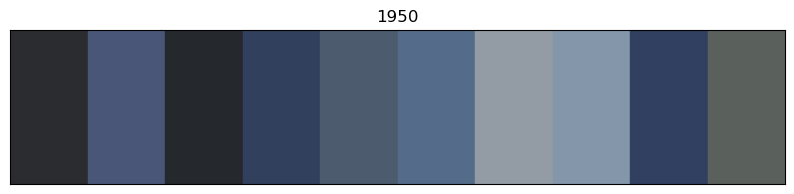

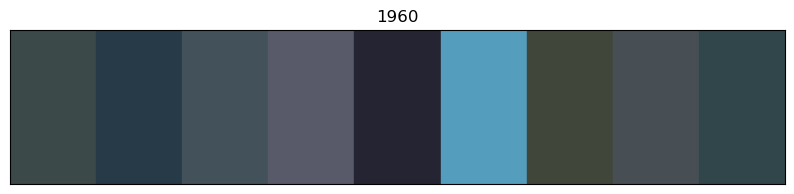

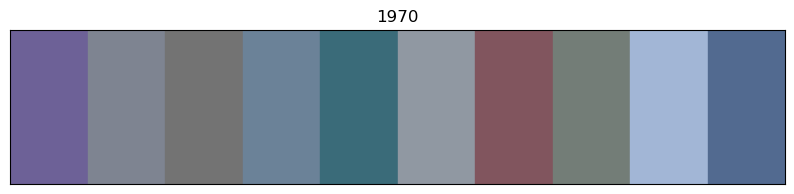

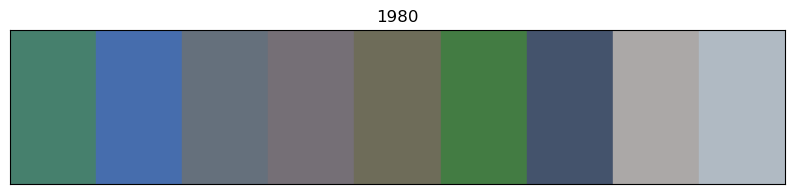

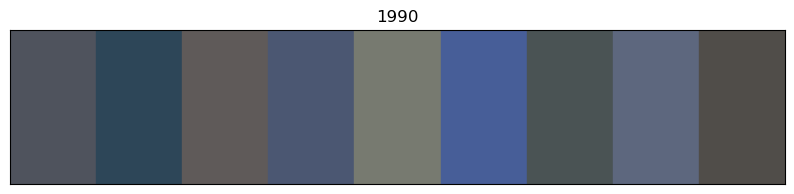

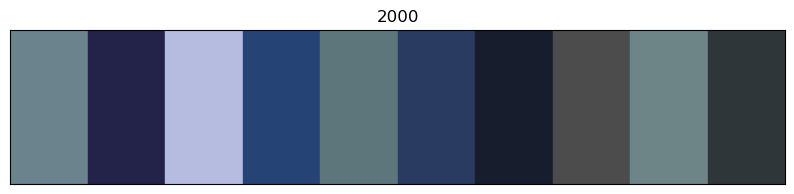

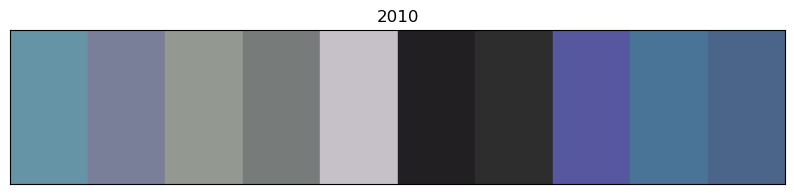

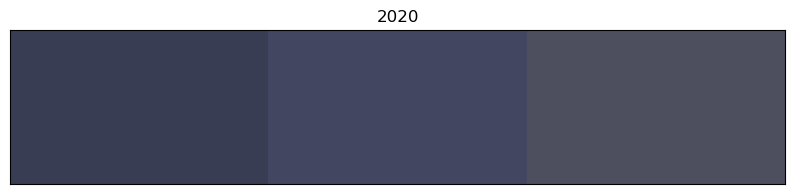

In [1]:
import pandas as pd
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Fetch colour data for every Archibald winning potrait
def get_avg_color(img):

    # read image from file
    myimg = cv2.imread('./images/ArchibaldWinners/' + img)

    # convert to numpy array
    avg_color_per_row = np.average(myimg, axis=0)

    # average the colors
    avg_color = np.average(avg_color_per_row, axis=0)
    return avg_color

# sort files by name
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir('./images/ArchibaldWinners') if isfile(join('./images/ArchibaldWinners', f))]
onlyfiles.sort()

# change to dataframe
of_df = pd.DataFrame(onlyfiles)

# add year column and fix one-off error in 1991
of_df['year'] = of_df[0].apply(lambda x: int(x.split('_')[0]))
of_df.loc[of_df[0] == '1990_SID78808M.jpg.641x900_q85.jpg','year'] = 1991

# add decade column
of_df['decade'] = [ int(np.floor(int(year)/10) * 10) 
                       for year in np.array(of_df["year"])]

# add RGB columns for averaged colour
of_df[['r','g','b']] = of_df[0].apply(lambda x: list(get_avg_color(x))).tolist()

# add HEX column for averaged colour
for x in of_df.sort_values('year').decade.unique():

    # sort by year
    images_df_sorted = of_df[of_df.decade == x].sort_values('year')

    # convert RGB to HEX code
    colors = list(zip(images_df_sorted.r, images_df_sorted.g, images_df_sorted.b))
    scaled_colours = [[color / 255 for color in row] for row in colors]

    # plot colour bars in order by decade
    fig, ax = plt.subplots(figsize=(10, 2))
    ax.axis(xmin=0, xmax=len(scaled_colours))
    ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
    for index, colour in enumerate(scaled_colours): ax.axvspan(index, index + 1, color=colour)

    # add year labels
    plt.title(x)

### Info about colour averaging and categorisation

The below code is focused on extracting and categorising colors from a collection of images. It begins by importing various libraries, including PIL, OpenCV, and matplotlib, which are used for image manipulation and visualization, as well as external packages like extcolors and colormath for color extraction and categorization.

#### Step 1
The get_closest_color() function is used to determine the closest named color to a given RGB value using the CIE2000 algorithm, which measures the difference between two colors in terms of their perceived similarity. The color names and corresponding RGB values are stored in a color_map dictionary, which is created using the webcolors library.

The CIE2000 algorithm is named after the International Commission on Illumination (CIE), an organization that sets standards for color measurement and specification. The algorithm takes into account how colors are perceived by the human eye, including factors like brightness, saturation, and hue. It was developed to improve upon earlier color difference formulas, which were found to be inadequate for accurately describing how colors appear to the human eye.

#### Step 2
Next, the code reads in a list of image file names from a directory and uses the extcolors library to extract the dominant colors from each image. The extracted colors are then processed using the color_to_df() function to create a dataframe of color codes, occurrence frequencies, and proportions.

The code then ranks the colors by their proportion and assigns a color name using the get_closest_color() function and the color_map dictionary. The color_map dictionary is essentially a collection of named colors and their corresponding RGB values. In this code, the color_map dictionary is created using the webcolors library, which provides a list of 147 named colors and their corresponding RGB values in a convenient format. The reason the color_map dictionary is useful is that it allows the code to assign a human-readable name to each color it extracts from an image. For example, if the code extracts a color that is very close to (255, 0, 0), it can look up that RGB value in the color_map dictionary and see that it corresponds to the color name "red." This makes it easier for humans to interpret and analyze the resulting data.

#### Step 3
Finally, the resulting color data is concatenated into a single dataframe for further analysis.

In [32]:
# # Takes 3 minutes to run
# import matplotlib.patches as patches
# import matplotlib.image as mpimg

# from PIL import Image
# from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# import cv2
# import extcolors

# from colormap import rgb2hex
# from colormath.color_objects import sRGBColor, LabColor
# from colormath.color_conversions import convert_color
# from colormath.color_diff import delta_e_cie2000
# import webcolors

# # use webcolors to find closest color name
# def get_closest_color(requested_color, color_map):
#     requested_color = sRGBColor(*requested_color)
#     requested_color = convert_color(requested_color, LabColor)

#     min_distance = float("inf")
#     closest_color = None
#     for color_name, color_rgb in color_map.items():
#         color = sRGBColor(*color_rgb)
#         color = convert_color(color, LabColor)
#         distance = delta_e_cie2000(requested_color, color)
#         if distance < min_distance:
#             min_distance = distance
#             closest_color = color_name

#     return closest_color

# # create dictionary of webcolors
# color_map = {color_name: webcolors.name_to_rgb(color_name) for color_name in webcolors.CSS3_NAMES_TO_HEX.keys()}

# from os import listdir
# from os.path import isfile, join
# onlyfiles = [f for f in listdir('./images/ArchibaldWinners') if isfile(join('./images/ArchibaldWinners', f))]

# # convert extcolors output to dataframe
# def color_to_df(input):
#     colors_pre_list = str(input).replace('([(','').split(', (')[0:-1]
#     df_rgb = [i.split('), ')[0] + ')' for i in colors_pre_list]
#     df_percent = [i.split('), ')[1].replace(')','') for i in colors_pre_list]
    
#     #convert RGB to HEX code
#     df_color_up = [rgb2hex(int(i.split(", ")[0].replace("(","")),
#                           int(i.split(", ")[1]),
#                           int(i.split(", ")[2].replace(")",""))) for i in df_rgb]
    
#     df = pd.DataFrame(zip(df_color_up, df_percent), columns = ['c_code','occurence'])
#     return df

# # create dataframe of colors
# df_colors = pd.DataFrame(columns = ['c_code','occurence'])

# # sort files by name
# onlyfiles.sort()

# # extract colors from images and add to dataframe
# for f in onlyfiles:
#     colors_x = extcolors.extract_from_path('./images/ArchibaldWinners/' + f, 
#                                            tolerance = 12, limit = 25)
#     df_color = color_to_df(colors_x)
#     df_color['proportion'] = df_color['occurence'].astype(float) / df_color['occurence'].astype(float).sum()
#     df_color['rank'] = df_color['proportion'].rank(ascending=False)
#     df_color['color_name'] = df_color.c_code.\
#         apply(lambda x: get_closest_color(webcolors.hex_to_rgb(x), color_map))
#     df_color['year'] = f[:4]
#     df_colors = pd.concat([df_colors, df_color], ignore_index=True)

# df_colors.to_csv('data/Archibald_colors.csv', index=False)          

# Fetch colour data for every Archibald winning potrait
df_colors = pd.read_csv('data/Archibald_colors.csv')

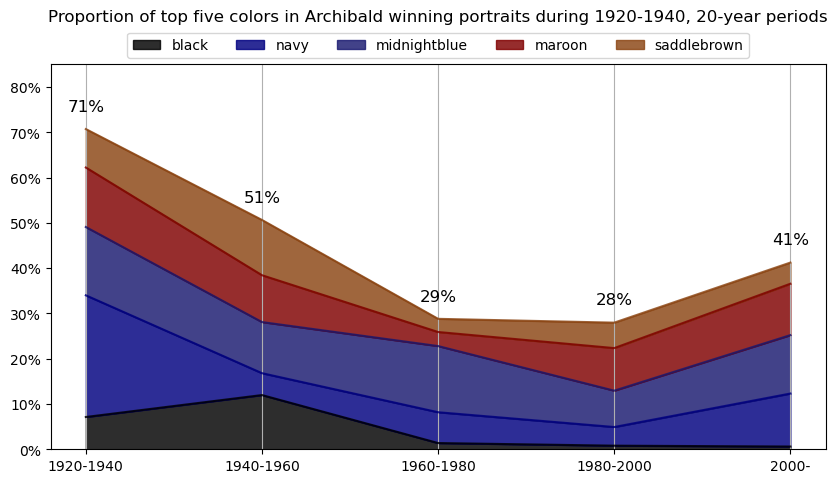

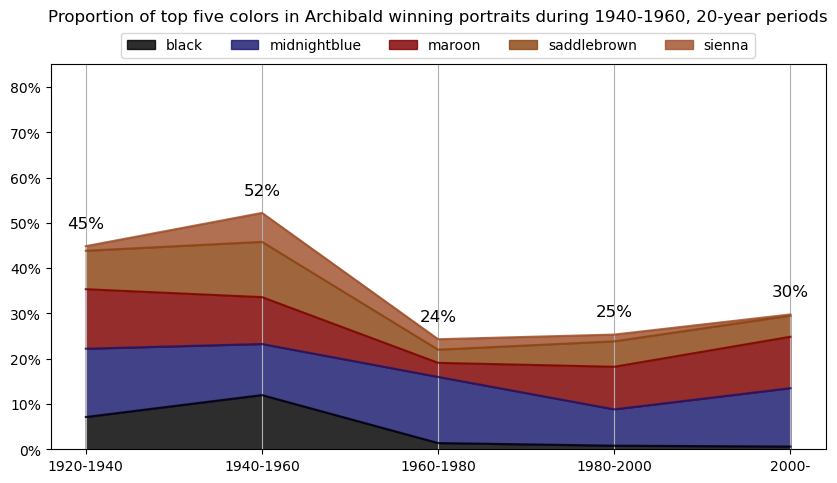

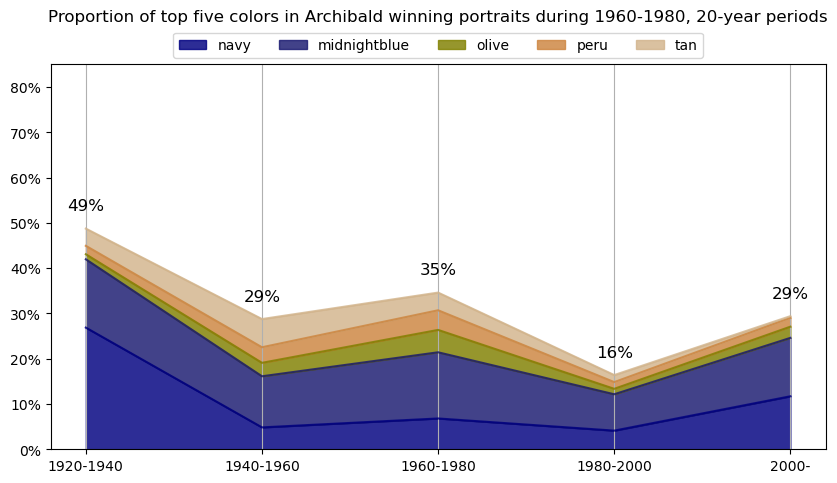

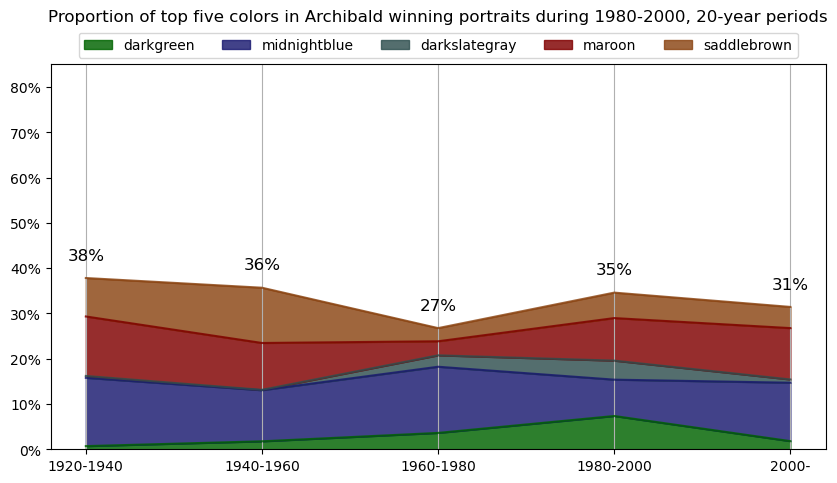

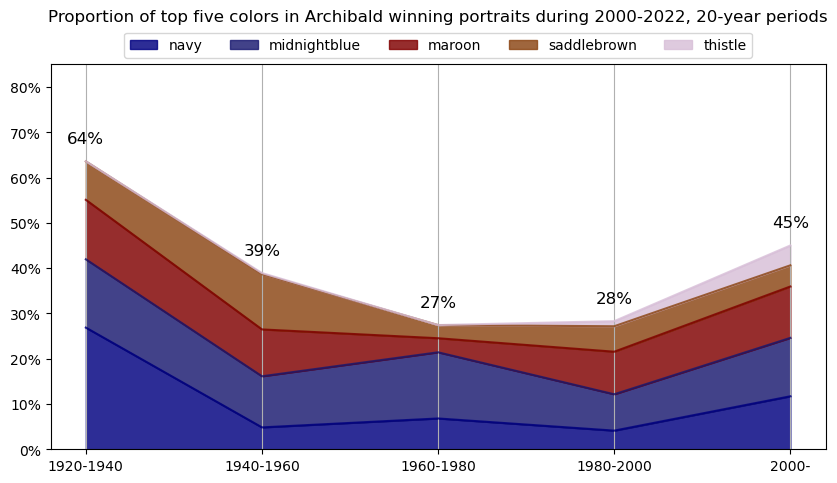

In [35]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import StrMethodFormatter
from webcolors import CSS3_NAMES_TO_HEX

# create a new column for the year in 10 year intervals
df_colors['year_vicennium'] = df_colors['year'].astype(int).apply(lambda x: x - x % 20)
df_colors['year_vicennium'] = np.where(df_colors['year_vicennium'] == 2020, 2000, df_colors['year_vicennium'])

# create a new column for the proportion of colors in each year
len_20_cols = df_colors[df_colors['year_vicennium'] == 1920]['year'].nunique()
len_40_cols = df_colors[df_colors['year_vicennium'] == 1940]['year'].nunique()
len_60_cols = df_colors[df_colors['year_vicennium'] == 1960]['year'].nunique()
len_80_cols = df_colors[df_colors['year_vicennium'] == 1980]['year'].nunique()
len_00_cols = df_colors[df_colors['year_vicennium'] == 2000]['year'].nunique()
df_colors['proportion2'] = np.where(df_colors['year_vicennium'] == 1920, df_colors['proportion']/len_20_cols, np.nan)
df_colors['proportion2'] = np.where(df_colors['year_vicennium'] == 1940, df_colors['proportion']/len_40_cols, df_colors['proportion2'])
df_colors['proportion2'] = np.where(df_colors['year_vicennium'] == 1960, df_colors['proportion']/len_60_cols, df_colors['proportion2'])
df_colors['proportion2'] = np.where(df_colors['year_vicennium'] == 1980, df_colors['proportion']/len_80_cols, df_colors['proportion2'])
df_colors['proportion2'] = np.where(df_colors['year_vicennium'] == 2000, df_colors['proportion']/len_00_cols, df_colors['proportion2'])

for y in df_colors['year_vicennium'].unique():
    # get the top 5 colors for each year
    top5cols = df_colors[df_colors.year_vicennium == y]\
                .groupby(['year_vicennium','color_name'])\
                .agg({'proportion2':'sum'}).reset_index()\
                .sort_values(['year_vicennium','proportion2'], ascending=[True,False])\
                .groupby('year_vicennium')\
                .head(5)['color_name'].unique()

    df_colors_top5 = df_colors[df_colors.color_name.isin(top5cols)]\
                .groupby(['year_vicennium','color_name'])\
                .agg({'proportion2':'sum'}).reset_index()\
                .sort_values(['year_vicennium','proportion2'], ascending=[True,False])\
                .groupby('year_vicennium')\
                .head(5)

    df_colors_top5_pivot = df_colors_top5\
        .pivot(index='year_vicennium', columns='color_name', values='proportion2')\
        .fillna(0)

    # create a new column for the RGB values of each color
    df_colors_top5['red'] = df_colors_top5['color_name']\
        .apply(lambda x: int(CSS3_NAMES_TO_HEX[x][1:3], 16))
    df_colors_top5['green'] = df_colors_top5['color_name']\
        .apply(lambda x: int(CSS3_NAMES_TO_HEX[x][3:5], 16))
    df_colors_top5['blue'] = df_colors_top5['color_name']\
        .apply(lambda x: int(CSS3_NAMES_TO_HEX[x][5:], 16))

    # Define a list of column names to order by
    ordered_columns = df_colors_top5\
        .sort_values(['red','green','blue'], ascending=[True,True,True])['color_name']\
        .unique()

    # Reorder the columns
    df_colors_top5_pivot = df_colors_top5_pivot.reindex(columns=ordered_columns)

    # plot stacked area chart
    df_colors_top5_pivot\
        .plot.area(stacked=True, figsize=(10,5), 
        color=df_colors_top5_pivot.columns, 
        alpha=0.825)

    # add labels for sum of proportions for each year
    for i,x in enumerate(df_colors_top5_pivot.index):
        plt.text(x, df_colors_top5_pivot.iloc[i].sum()+0.05,
        f'{df_colors_top5_pivot.iloc[i].sum():.0%}', 
        ha='center', va='center', fontsize=12)

    plt.legend(loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1.1))

    # Set the y-axis limts
    plt.ylim(0, 0.85)

    # Set the y-axis formatter to show percentages
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

    plt.xlabel("")
    plt.grid(axis='x')
    plt.xticks([1920,1940,1960,1980,2000], 
    ['1920-1940', '1940-1960', '1960-1980','1980-2000', '2000-'])

    if y == 2000: plus20 = 2022
    else: plus20 = y + 20
    plt.title(f'Proportion of top five colors in Archibald winning portraits during {y}-{plus20}, 20-year periods\n\n')
    
    
    plt.show()